In [9]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
# HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
# CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
# Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
# Destination - The planet the passenger will be debarking to.
# Age - The age of the passenger.
# VIP - Whether the passenger has paid for special VIP service during the voyage.
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
# Name - The first and last names of the passenger.
# Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

raw_train_data = pd.read_csv('C:/Users/amaur/ML/kaggle/titanic/train.csv')
raw_test_data = pd.read_csv('C:/Users/amaur/ML/kaggle/titanic/test.csv')


In [10]:
train_data = raw_train_data.drop(['Name', 'PassengerId'], axis=1)
train_data[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'Transported']] = train_data[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'Transported']].fillna(value=0)

# encoding (one-hot)
def encode_one_hot(columns, data_set):
    for col in columns:
        one_hot = pd.get_dummies(data_set[col], prefix=col)
        data_set = pd.concat([data_set, one_hot], axis=1)
        data_set = data_set.drop(col, axis=1)
    return data_set

to_encode = ['Cabin', 'Destination', 'HomePlanet']
train_data = encode_one_hot(to_encode, train_data)
to_astype_int = train_data.select_dtypes(include=['bool']).columns
train_data[to_astype_int] = train_data[to_astype_int].astype(int)
y_train = train_data['Transported']
x_train = train_data.drop('Transported', axis=1)
input_shape = x_train.shape[1]

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_validation)
print(x_val_scaled, x_train_scaled)

[[-0.72595401 -0.61908548 -0.15148573 ... -1.06356365 -0.56926885
   1.99802487]
 [-0.72595401 -0.68627111 -0.15148573 ...  0.94023522 -0.56926885
  -0.50049427]
 [ 1.37749773  0.85899826 -0.15148573 ...  0.94023522 -0.56926885
  -0.50049427]
 ...
 [-0.72595401 -0.75345673 -0.15148573 ...  0.94023522 -0.56926885
  -0.50049427]
 [ 1.37749773  0.92618388 -0.15148573 ... -1.06356365 -0.56926885
   1.99802487]
 [-0.72595401 -0.75345673 -0.15148573 ...  0.94023522 -0.56926885
  -0.50049427]] [[-0.72595401 -0.01441486 -0.15148573 ...  0.94023522 -0.56926885
  -0.50049427]
 [-0.72595401 -0.75345673 -0.15148573 ...  0.94023522 -0.56926885
  -0.50049427]
 [ 1.37749773 -0.01441486 -0.15148573 ... -1.06356365  1.75663924
  -0.50049427]
 ...
 [-0.72595401 -0.41752861 -0.15148573 ...  0.94023522 -0.56926885
  -0.50049427]
 [-0.72595401  0.38869889 -0.15148573 ... -1.06356365 -0.56926885
   1.99802487]
 [-0.72595401 -0.01441486 -0.15148573 ... -1.06356365  1.75663924
  -0.50049427]]


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape, )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=150, validation_data=(x_val_scaled, y_validation))


c:\Users\amaur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5010 - loss: 0.6994 - val_accuracy: 0.5049 - val_loss: 0.6931
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5035 - loss: 0.6931 - val_accuracy: 0.5049 - val_loss: 0.6931
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5124 - loss: 0.6930 - val_accuracy: 0.5049 - val_loss: 0.6931
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5121 - loss: 0.6931 - val_accuracy: 0.5049 - val_loss: 0.6931
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5084 - loss: 0.6931 - val_accuracy: 0.5049 - val_loss: 0.6931
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5029 - loss: 0.6932 - val_accuracy: 0.5049 - val_loss: 0.6931
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5049 - val_loss: 0.6931
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5035 - loss: 0.6932 - val_accuracy: 0.5049 - val_loss

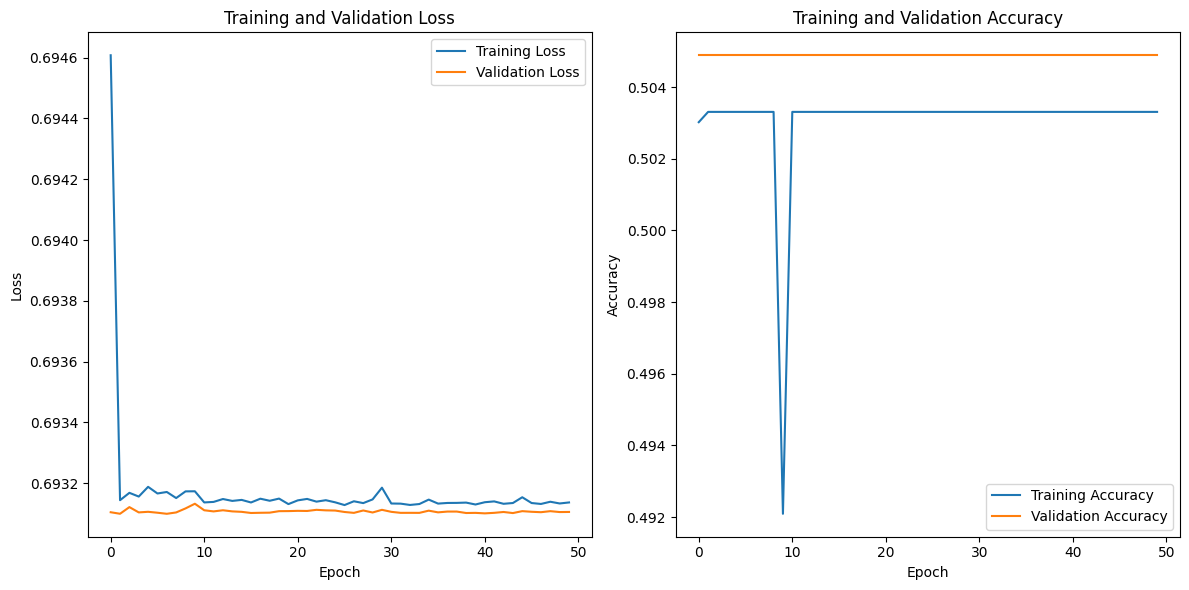

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4964 - loss: 0.6932
Validation Accuracy: 0.5048878788948059


In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

loss, accuracy = model.evaluate(x_val_scaled, y_validation)

print(f'Validation Accuracy: {accuracy}')
